In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras as keras

/Users/kamaliravi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
pip install tensorflow

     |████████████████████████████████| 216.2 MB 28.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 129.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 30.1 MB/s  eta 0:00:01
     |████████████████████████████████| 8.9 MB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 26.7 MB 132.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 114.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 166.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 37.9 MB/s  eta 0:00:01
     |████████████████████████████████| 400 kB 134.1 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 38.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.8 MB 90.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 129.3 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 17.0 MB/s  eta 0:00:01
     |██████████████████

In [56]:
# Loading the data

cust_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
cust_data.shape

(7043, 21)

In [58]:
cust_data.iloc[488]
#cust_data.iloc[488]['TotalCharges']

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [59]:
# Data Exploration 

cust_data.drop('customerID', axis='columns', inplace=True)


In [60]:
cust_data.head()
cust_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
cust_data.TotalCharges.values



array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [62]:

#print(cust_data['TotalCharges']==' ')

pd.to_numeric(cust_data['TotalCharges'],errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [63]:
cust_data[pd.to_numeric(cust_data['TotalCharges'],errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [64]:
cust_data = cust_data[cust_data['TotalCharges']!=' ']
cust_data.shape

(7032, 20)

In [65]:
cust_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [66]:
cust_data['TotalCharges'] = pd.to_numeric(cust_data['TotalCharges'])


In [67]:
cust_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

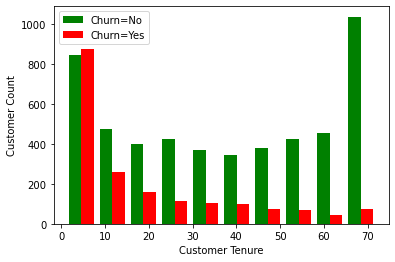

In [68]:
#tenure vs churn

tenure_churn_no = cust_data[cust_data.Churn=='No'].tenure
tenure_churn_yes = cust_data[cust_data.Churn == 'Yes'].tenure

plt.hist([tenure_churn_no,tenure_churn_yes], color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.xlabel("Customer Tenure")
plt.ylabel("Customer Count")
plt.legend()
plt.show

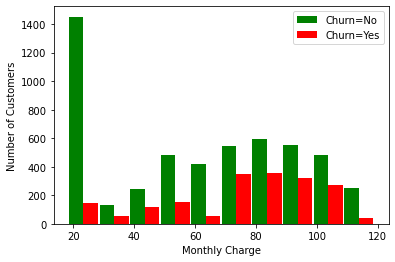

In [69]:
#Monthly charge vs churn

mc_churn_no = cust_data[cust_data.Churn=='No'].MonthlyCharges 
mc_churn_yes = cust_data[cust_data.Churn == 'Yes'].MonthlyCharges 

plt.hist([mc_churn_no,mc_churn_yes], rwidth=0.95 ,color=['green','red'], label = ['Churn=No','Churn=Yes'])
plt.xlabel('Monthly Charge')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

In [82]:
def unique_col(cust_data):
    for column in cust_data:
        if (cust_data[column].dtypes == 'object'):
            print(f'{column} : {cust_data[column].unique()}')


In [91]:
unique_col(cust_data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [90]:
cust_data.replace('No internet service','No',inplace=True)
cust_data.replace('No phone service','No', inplace=True)

In [106]:
cust_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [107]:
yes_no_col = ['Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for column in yes_no_col:
    cust_data[column].replace({'Yes':1,'No':0}, inplace= True)

In [110]:
for column in cust_data:
    print(f"{column} : {cust_data[column].unique()}")
   

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [111]:
cust_data['gender'].replace({"Female":1,"Male": 0}, inplace=True)

In [112]:
unique_col(cust_data)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [114]:
#one hot encoding get_dummies

cst_data = pd.get_dummies(data = cust_data, columns=['InternetService','Contract','PaymentMethod'])
cst_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [116]:
cst_data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4124,1,1,1,0,19,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2912,0,1,1,0,32,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
5792,1,1,0,0,15,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
1529,1,0,1,0,59,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2305,0,0,1,1,34,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [117]:
cst_data.shape

(7032, 27)

In [118]:
cst_data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [121]:
#scaling 

scale_cols = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()

cst_data[scale_cols] = scaler.fit_transform(cst_data[scale_cols])

In [122]:
cst_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4523,0,1,1,0,0.126761,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5037,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1217,0,0,1,0,0.859155,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [126]:
X = cst_data.drop('Churn', axis='columns')
y = cst_data['Churn']

In [127]:
# Train and Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 5)

In [129]:
X_train.shape

(5625, 26)

In [130]:
X_test.shape

(1407, 26)

In [ ]:
# TensorFlow model

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,) , activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train,y_train, epochs=50)


In [ ]:
# model evaluation 
model.evaluate(X_test,y_test)

In [ ]:
yp = model.predict(X_test)
yp[:5]

In [ ]:
from sklearn.metrics import confusion_matrix, classifciation_report

print(classification_report(y_test,y_pred))

In [ ]:
import seaborn as sn 
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel("truth")